### This notebook is optionally accelerated with a GPU runtime.
### If you would like to use this acceleration, please select the menu option "Runtime" -> "Change runtime type", select "Hardware Accelerator" -> "GPU" and click "SAVE"

----------------------------------------------------------------------

# ResNet

*Author: Pytorch Team*

**Deep residual networks pre-trained on ImageNet**

<img src="https://pytorch.org/assets/images/resnet.png" alt="alt" width="50%"/>

In [ ]:
import torch
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet18', pretrained=True)
# or any of these variants
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet34', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet101', pretrained=True)
# model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet152', pretrained=True)
model.eval()

Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth


  0%|          | 0.00/44.7M [00:00<?, ?B/s]

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
  

All pre-trained models expect input images normalized in the same way,
i.e. mini-batches of 3-channel RGB images of shape `(3 x H x W)`, where `H` and `W` are expected to be at least `224`.
The images have to be loaded in to a range of `[0, 1]` and then normalized using `mean = [0.485, 0.456, 0.406]`
and `std = [0.229, 0.224, 0.225]`.

Here's a sample execution.

In [ ]:
!pwd

/content


In [ ]:
!wget https://github.com/sunericd/dnn-illusion/raw/master/stimuli/Images_HG.zip
!unzip /content/Images_HG.zip

--2022-07-18 01:29:24--  https://github.com/sunericd/dnn-illusion/raw/master/stimuli/Images_HG.zip
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sunericd/dnn-illusion/master/stimuli/Images_HG.zip [following]
--2022-07-18 01:29:24--  https://raw.githubusercontent.com/sunericd/dnn-illusion/master/stimuli/Images_HG.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1566490 (1.5M) [application/zip]
Saving to: ‘Images_HG.zip’

Images_HG.zip       100%[===================>]   1.49M  --.-KB/s    in 0.04s   

2022-07-18 01:29:25 (34.5 MB/s) - ‘Images_HG.zip’ saved [1566490/1566490]

Archive:  /co

In [ ]:
import glob
f = glob.glob('HG/*.png')
print(f)
filename = f[0]

['HG/img_135_black.png', 'HG/img_347_black.png', 'HG/img_210_white.png', 'HG/img_285_white.png', 'HG/img_293_white.png', 'HG/img_274_black.png', 'HG/img_96_gray.png', 'HG/img_222_black.png', 'HG/img_372_gray.png', 'HG/img_157_white.png', 'HG/img_173_black.png', 'HG/img_24_black.png', 'HG/img_166_black.png', 'HG/img_342_black.png', 'HG/img_37_white.png', 'HG/img_283_white.png', 'HG/img_71_white.png', 'HG/img_216_white.png', 'HG/img_229_gray.png', 'HG/img_27_black.png', 'HG/img_262_white.png', 'HG/img_349_black.png', 'HG/img_355_white.png', 'HG/img_291_gray.png', 'HG/img_196_black.png', 'HG/img_136_black.png', 'HG/img_29_gray.png', 'HG/img_84_gray.png', 'HG/img_125_white.png', 'HG/img_361_gray.png', 'HG/img_97_black.png', 'HG/img_206_black.png', 'HG/img_95_gray.png', 'HG/img_52_black.png', 'HG/img_261_gray.png', 'HG/img_145_gray.png', 'HG/img_276_gray.png', 'HG/img_69_gray.png', 'HG/img_197_gray.png', 'HG/img_354_white.png', 'HG/img_68_gray.png', 'HG/img_215_white.png', 'HG/img_169_gray.

In [ ]:
# sample execution (requires torchvision)
from PIL import Image
from torchvision import transforms
input_image = Image.open(filename)
preprocess = transforms.Compose([
    transforms.Resize(256),
    transforms.CenterCrop(224),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
])
input_tensor = preprocess(input_image)
input_batch = input_tensor.unsqueeze(0) # create a mini-batch as expected by the model

# move the input and model to GPU for speed if available
if torch.cuda.is_available():
    input_batch = input_batch.to('cuda')
    model.to('cuda')

with torch.no_grad():
    output = model(input_batch)
# Tensor of shape 1000, with confidence scores over Imagenet's 1000 classes
print(output[0])
# The output has unnormalized scores. To get probabilities, you can run a softmax on it.
probabilities = torch.nn.functional.softmax(output[0], dim=0)
print(probabilities)

tensor([-3.2345e+00,  1.4605e-02, -1.7264e+00, -1.2260e+00,  1.9032e-01,
         8.0228e-01, -1.3225e+00, -2.8161e-01, -8.9138e-01, -1.6260e+00,
        -2.2692e+00, -1.3055e+00, -2.4897e+00, -1.5005e+00, -2.9602e+00,
        -2.6720e+00, -1.7479e+00, -2.3646e+00, -8.6316e-01, -1.9210e+00,
        -2.0642e+00, -1.5337e+00, -2.5084e+00, -1.5189e+00, -1.1709e+00,
        -7.7048e-02,  4.1996e-01,  3.7031e-01, -6.1362e-01, -6.2684e-01,
        -5.7022e-01,  4.0572e+00,  4.5160e-01, -1.7977e+00, -5.4391e-01,
        -1.5610e+00, -5.0022e-01, -2.9261e+00,  5.9502e-01, -1.5662e+00,
         8.6974e-01, -8.2972e-01, -2.8911e+00, -2.1349e+00, -3.0596e-01,
        -1.4314e+00,  1.1565e+00, -9.0351e-01, -2.6847e+00, -1.3901e+00,
        -1.8562e-01, -1.1249e+00,  1.0540e+00, -4.9757e-01,  6.3149e-01,
         1.9717e-01, -1.2848e+00, -1.9595e+00, -2.8436e+00,  2.3537e+00,
         2.5131e+00, -1.5007e+00, -1.2853e+00, -1.2594e-01, -6.3210e-01,
        -8.5162e-01,  3.3720e-01, -1.9292e+00,  6.2

In [ ]:
output.shape

torch.Size([1, 1000])

In [ ]:
# Download ImageNet labels
!wget https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt

--2022-07-14 03:08:29--  https://raw.githubusercontent.com/pytorch/hub/master/imagenet_classes.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10472 (10K) [text/plain]
Saving to: ‘imagenet_classes.txt’

imagenet_classes.tx 100%[===================>]  10.23K  --.-KB/s    in 0s      

2022-07-14 03:08:29 (85.7 MB/s) - ‘imagenet_classes.txt’ saved [10472/10472]



In [ ]:
# Read the categories
with open("imagenet_classes.txt", "r") as f:
    categories = [s.strip() for s in f.readlines()]
# Show top categories per image
top5_prob, top5_catid = torch.topk(probabilities, 5)
for i in range(top5_prob.size(0)):
    print(categories[top5_catid[i]], top5_prob[i].item())

shoji 0.3079128563404083
prison 0.07320060580968857
sliding door 0.030820030719041824
digital clock 0.028107035905122757
spotlight 0.02601173333823681


### get output of features

In [ ]:
model_new_1 = torch.nn.Sequential(*list(model.children()))[:-2]
model_new_1.eval()

Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Con

In [ ]:
with torch.no_grad():
    output = model_new_1(input_batch)
# Tensor of shape 
print(output[0])

tensor([[[1.3449, 1.9432, 1.0949,  ..., 1.5165, 2.0671, 1.1346],
         [2.1235, 3.0426, 1.8343,  ..., 2.4595, 3.4408, 2.0693],
         [1.6574, 2.4889, 0.7740,  ..., 1.4291, 2.6450, 2.1683],
         ...,
         [1.4474, 2.2948, 1.5267,  ..., 2.2311, 2.8747, 2.0817],
         [0.9758, 1.9545, 1.7069,  ..., 2.2973, 2.6454, 1.5904],
         [0.5492, 1.1031, 1.0266,  ..., 1.2014, 1.3234, 0.4252]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.2114],
         [0.0000, 0.0000, 0.0000,  ..., 0.1466, 0.4344, 0.6548],
         ...,
         [0.0000, 0.0000, 0.5445,  ..., 1.3004, 0.9447, 0.6391],
         [0.0000, 0.0000, 0.0000,  ..., 0.1786, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]],

        [[1.6891, 2.7407, 1.9514,  ..., 2.5567, 3.6477, 2.9160],
         [2.8198, 4.1868, 2.7760,  ..., 3.9495, 5.4782, 4.2258],
         [2.2616, 2.9625, 1.3489,  ..., 2.3415, 4.1703, 3.

In [ ]:
output.shape

torch.Size([1, 512, 7, 7])

### calculate dissimilarity score

In [ ]:
a1 = output.squeeze(0)
a1.shape

torch.Size([512, 7, 7])

In [ ]:
a2 = output.squeeze(0)
a2.shape

torch.Size([512, 7, 7])

In [ ]:
torch.sum(a1 - a2)

tensor(-1391.0018)

### Model Description

Resnet models were proposed in "Deep Residual Learning for Image Recognition".
Here we have the 5 versions of resnet models, which contains 18, 34, 50, 101, 152 layers respectively.
Detailed model architectures can be found in Table 1.
Their 1-crop error rates on imagenet dataset with pretrained models are listed below.

| Model structure | Top-1 error | Top-5 error |
| --------------- | ----------- | ----------- |
|  resnet18       | 30.24       | 10.92       |
|  resnet34       | 26.70       | 8.58        |
|  resnet50       | 23.85       | 7.13        |
|  resnet101      | 22.63       | 6.44        |
|  resnet152      | 21.69       | 5.94        |

### References

 - [Deep Residual Learning for Image Recognition](https://arxiv.org/abs/1512.03385)

In [ ]:
import csv
import matplotlib.pyplot as plt
plt.rcParams['axes.linewidth'] = 1.5 #set the value globally
plt.rcParams['axes.spines.right'] = False
plt.rcParams['axes.spines.top'] = False
import pylab as pl
import numpy as np
import pandas as pd
from scipy import stats
from os import listdir
from os.path import isfile, join

In [ ]:
def DLfc8Grapher (filename, saved_name, frange_list, title, x_title, metric='no'):
    
    imported_file = []
    imported_file = np.genfromtxt('Data/'+filename, delimiter=',')
    # Transposes files from the original DNN Dissimilarity results output
    transposed_file = imported_file.T
    
    fc8_diss_values = transposed_file[-1] # records fc8 layer outputs
    fc8_diss_values = fc8_diss_values.tolist()
    del fc8_diss_values[0]
    fc8_diss_values = fc8_diss_values[::-1] # flip for dot lightness
    taskNames = np.arange(frange_list[0], frange_list[1]+1, frange_list[2])   
    
    N = len(taskNames) - len(fc8_diss_values)
    taskNames = taskNames[N:]
    # converting to python list and rounding so human_point matches exactly
    taskNamesconverted = np.ndarray.tolist(taskNames)
    taskNames = [round(n, 2) for n in taskNamesconverted]

    from matplotlib.ticker import FormatStrFormatter
    fig, ax = plt.subplots()
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.plot(taskNames[::-1], fc8_diss_values, 'k', linewidth=2.0)
    #plt.title(title)
    plt.xlabel(x_title, fontsize=18)
    plt.ylabel('Rep. dissimilarity, $R$', fontsize=18)
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    
    if metric == 'yes':
        score = concavity_metric(fc8_diss_values)
        plt.text(0.05*max(taskNames), 0.05*max(fc8_diss_values), 'Concavity Score = ' + str(round(score, 3)))
    
    plt.tight_layout()
    plt.xlim(np.min(taskNames), np.max(taskNames))
    plt.ylim(0,None)
    plt.gca().invert_xaxis()
    #plt.savefig('Figures/FIGURES/'+saved_name+'.png', dpi=800)
    plt.show()


def concavity_metric (task_values):
    '''
    DEPRECATED
    '''
    # Assigns a score of concavity based on the positive differences between the initial and subsequent values
    score = 0
    initial_task = task_values[0]
    for task in task_values:
        if task >= initial_task:
            score += task-initial_task
#        else:
#            break # terminates after first sub-initial value (so score looks only at first region)
    return (score)


def AVG_DLfc8Grapher (filename, saved_name, frange_list, title, x_title, labels, metric='no', norm=False, show_title=False):
    '''
    norm = True --> normalize by average R
    '''
    
    # read file
    imported_file = []
    imported_file = np.genfromtxt('Data/'+filename, delimiter=',')
    
    # normalize
    if norm is True:
        #row_sums = np.sum(imported_file,axis=1)
        row_means = np.mean(imported_file,axis=1)
        for row in range(imported_file.shape[0]):
            if row_means[row] > 0:
                imported_file[row,:] = imported_file[row,:]/row_means[row]
    
    # get average and error bars
    fc8_diss_values = np.mean(imported_file, axis=0)
    #sems = np.std(imported_file, axis=0)
    #lower = fc8_diss_values - sems
    #upper = fc8_diss_values + sems
    lower = np.percentile(imported_file, 25, axis=0)
    upper = np.percentile(imported_file, 75, axis=0)
    
    # get task names
    taskNames = np.arange(frange_list[0], frange_list[1]+1, frange_list[2])   
    N = len(taskNames) - len(fc8_diss_values)
    taskNames = taskNames[N:]
    # converting to python list and rounding so human_point matches exactly
    taskNamesconverted = np.ndarray.tolist(taskNames)
    taskNames = [round(n, 2) for n in taskNamesconverted]

    # plot figure
    from matplotlib.ticker import FormatStrFormatter
    fig, ax = plt.subplots()
    if show_title is True:
        plt.title(title, fontsize=24)
    plt.plot(taskNames[::-1], fc8_diss_values, 'k', linewidth=2.0)
    ax.yaxis.set_major_formatter(FormatStrFormatter('%.2f'))
    plt.fill_between(taskNames[::-1], lower, upper, facecolor='k', alpha=0.1)
    if labels[0] is True:
        plt.ylabel('Rep. dissimilarity, $R$', fontsize=22)
    elif labels[0] is 'r':
        plt.ylabel('Rep. dissimilarity, $r$', fontsize=22)
    else:
        plt.ylabel('  ', fontsize=22)
    if labels[1] is True:
        plt.xlabel(x_title, fontsize=22)
    else:
        plt.xlabel('  ', fontsize=22)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlim(np.min(taskNames), np.max(taskNames))
    plt.ylim(0,None)
    plt.gca().invert_xaxis()
    plt.tight_layout()
#    plt.savefig('Figures/FIGURES/AVG_'+saved_name+'.png', dpi=800)
    plt.show()

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pwd

/content/gdrive


In [ ]:
%cd /content/gdrive/My Drive

/content/gdrive/My Drive


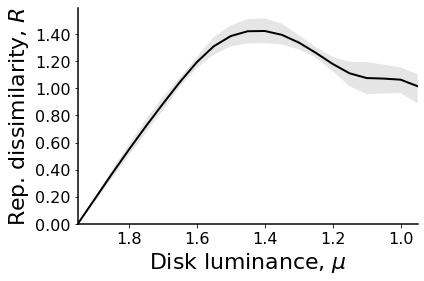

In [ ]:
AVG_DLfc8Grapher('vgg19/MATLAB_vgg19L1_white_to_black__SG', 'SG_Illusion', [0, 1.00, 0.05], 'SG_Illusion', 'Disk luminance, $\mu$', labels=[True, True],norm=True)

In [ ]:
imported_file = np.genfromtxt('Data/'+'vgg19/MATLAB_vgg19L1_white_to_black__SG', delimiter=',') #the data file we need

In [ ]:
imported_file.T.shape 
#the data sent to the graph generation code
#375 groups of photos (black,grey,white)
#21=3*7;(7*7)

(21, 375)